In [14]:
import pickle
import os
import glob
from typing import Dict, List
import tensorflow as tf
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
import pandas
import cv2

#### load Caltech 101 dataset  </br>
http://www.vision.caltech.edu/Image_Datasets/Caltech101/

In [15]:
# dowload dataset from http://www.vision.caltech.edu/Image_Datasets/Caltech101/
# and unzip to `dataset_path`

dataset_path = '/home/d.kuzin/datasets/caltech_101/101_ObjectCategories'

categories = os.listdir(dataset_path)

print('categories examples:', categories[:5], '...')
print('number of categories is', len(categories))
# the total number of categories equals 102, because there is a special category 
# `BACKGROUND_Google`, that contaise some random images

categories examples: ['laptop', 'dragonfly', 'hedgehog', 'wheelchair', 'gerenuk'] ...
number of categories is 102


In [16]:
mapping: Dict[str, int] = dict(zip(sorted(categories), range(len(categories))))

In [17]:
def get_files(path: str) -> List[str]:
    return [os.path.join(path, file) for file in os.listdir(path) 
            if os.path.isfile(os.path.join(path, file))]


def get_all_images(dataset_path: str) -> List[str]:
    categories = os.listdir(dataset_path)
    paths = []
    for category in categories:
        files = get_files(os.path.join(dataset_path, category))
        paths.extend(files)
    return paths


def read_image(image_path: str, output_size=(300, 200)) -> np.ndarray:
    """ read and resize image """
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, output_size, interpolation=cv2.INTER_CUBIC)
    return image


def show_image(image: np.ndarray, figsize=None):
    if figsize:
        plt.figure(figsize=figsize)
    plt.imshow(image, interpolation='nearest')
    plt.show()

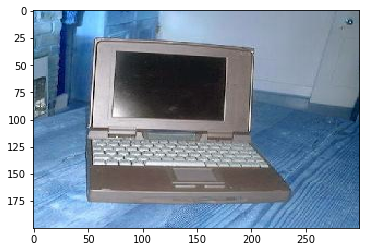

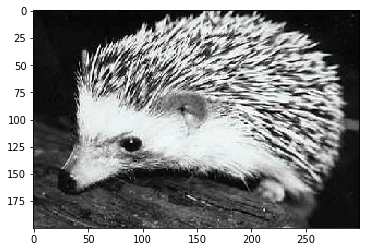

In [18]:
images_paths = get_all_images(dataset_path)
show_image(read_image(images_paths[0]))
show_image(read_image(images_paths[150]))

In [19]:
def images_per_category(dataset_path: str) -> Dict[str, int]:
    categories = os.listdir(dataset_path)
    counter = Counter()
    for category in categories:
        nb = len(get_files(os.path.join(dataset_path, category)))
        counter[category] = nb
    return counter

counts = images_per_category(dataset_path)

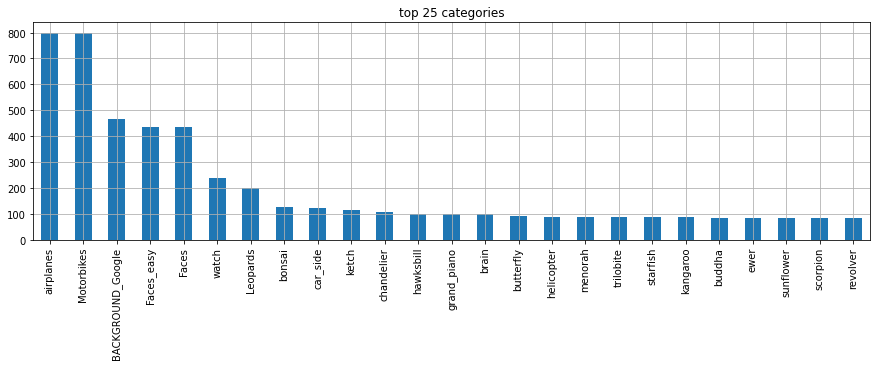

In [20]:
topK = 25
title = f"top {topK} categories"
df = pandas.DataFrame.from_dict(dict(counts.most_common(topK)), orient='index')
df.plot(kind='bar', grid=True, title=title, figsize=(15,4), legend=False)
plt.show()

#### model

In [21]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Dense(128, name='bottleneck'))
model.add(Dense(784, activation=tf.nn.sigmoid))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.compat.v1.losses.sigmoid_cross_entropy)

#model.fit(x, x, batch_size=32, epochs=10)


In [22]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
                                
model = MyModel()

NameError: name 'Conv2D' is not defined

In [411]:
n = 5
hidden_size = 100
layers = [tf.keras.layers.Dense(hidden_size, activation=tf.nn.sigmoid) for _ in range(n)]
perceptron = tf.keras.Sequential(layers)
# perceptron.trainable_variables

ValueError: Weights for model sequential_8 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [ ]:
def encoder():
    pass



def decoder():
    pass



